1. Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
!pip install catboost
!pip install -U xgboost
from catboost import CatBoostRegressor
import pickle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.4 MB/s eta 0:00:00


2. Data Collection & Analysis

In [2]:
# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('/content/insurance.csv')

In [3]:
# to get the idea of the dataset
# first 10 rows of the dataframe
insurance_dataset.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


we are going to predict the charges so here the column "charges" is the target, other columns are called features. we will use this features to find patterns that will help us to predict the charge.

In [4]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [5]:
# want to see more informations about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features:
- Sex
- Smoker
- Region

these columns have categorical values ; no numerical value

In [6]:
# checking for missing values
insurance_dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


We dont have any missing values. isnull() will return true if there is missing value. then .sum() will add the number of "true" in a column, since every column is showing 0 here.

that means in our dataset there is no missing values.

##3. Data Analysis and EDA

In [7]:
# statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


this code only decribed 4 columns, but or dataset has 7 columns. the remaining 3 columns has categorical (not number) value. so it is not shown here.

Now we are going to check distribution of each column.

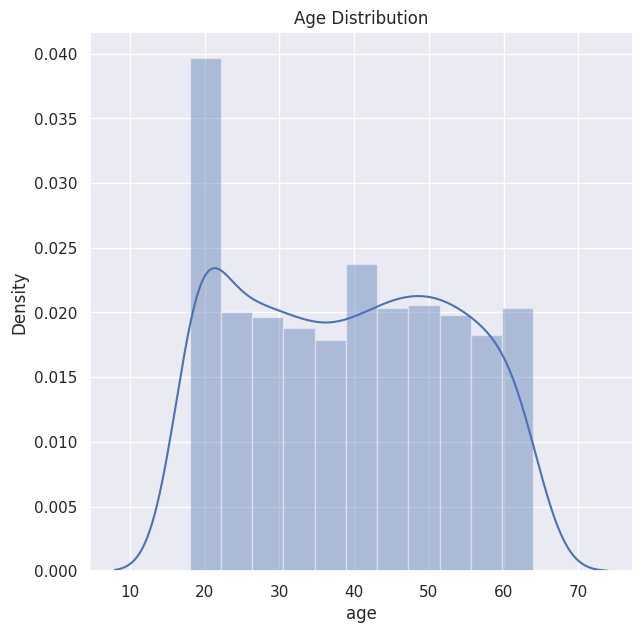

In [9]:
# distribution of 'age' column value
sns.set()
plt.figure(figsize=(7,7))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

The distribution is almost Normal.

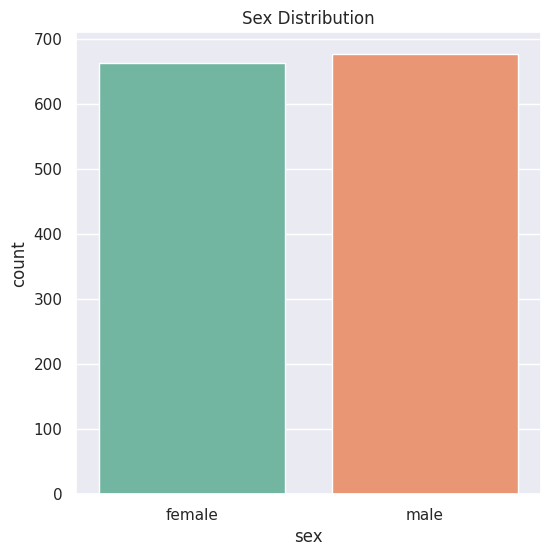

In [10]:
#now for the gender column

# Set a color palette
plt.figure(figsize=(6, 6))
sns.countplot(x='sex', data=insurance_dataset, palette='Set2')
plt.title('Sex Distribution')
plt.show()

Gender is categorical data, that is why we are using count plot, it it counting the 'male', 'female'

The distribution is almost equal.

In [11]:
#want to see the exact value count
insurance_dataset['sex'].value_counts()

,count
sex,
male,676
female,662


now the 3rd column is BMI, it is not categorical.

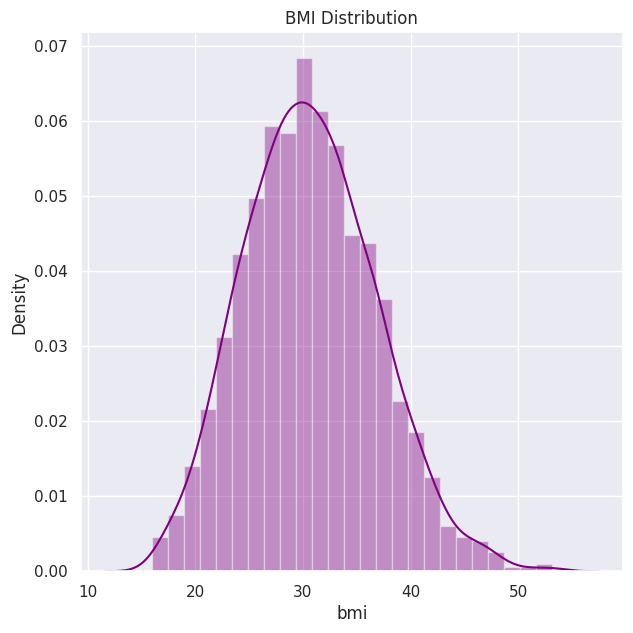

In [13]:
# bmi distribution
plt.figure(figsize=(7,7))
sns.distplot(insurance_dataset['bmi'], color='purple')
plt.title('BMI Distribution')
plt.show()

We can see its a normal distribution.

Normal BMI Range --> 18.5 to 24.9

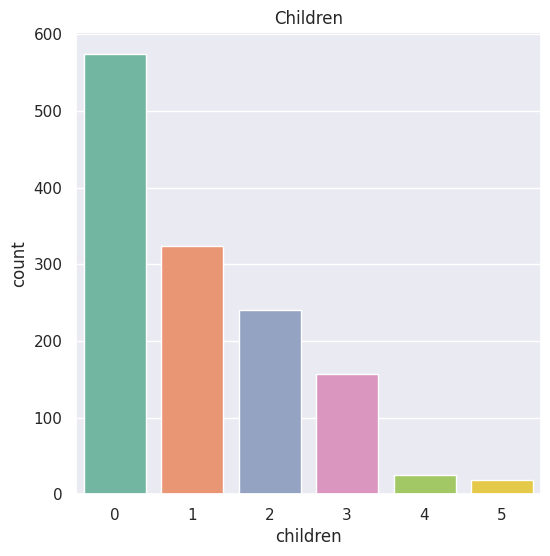

In [14]:
# now for children column

plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset, palette='Set2')
plt.title('Children')
plt.show()

the children column has 6 different values (0,1,2,3,4,5) that is why we are using countplot.

In [15]:
insurance_dataset['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


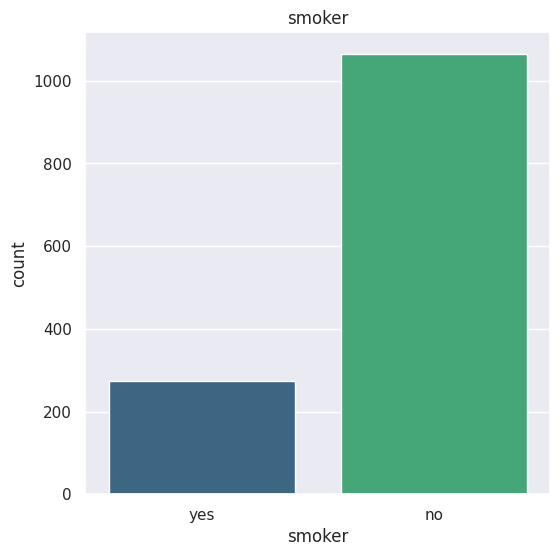

In [16]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset,  palette='viridis')
plt.title('smoker')
plt.show()

In [17]:
insurance_dataset['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


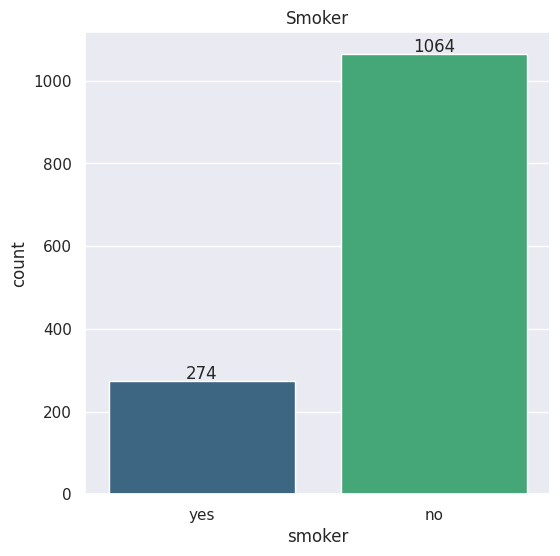

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot with a color palette for different colors
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='smoker', data=insurance_dataset, palette='viridis')
plt.title('Smoker')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.show()

#in this way the value can be also included in the chart

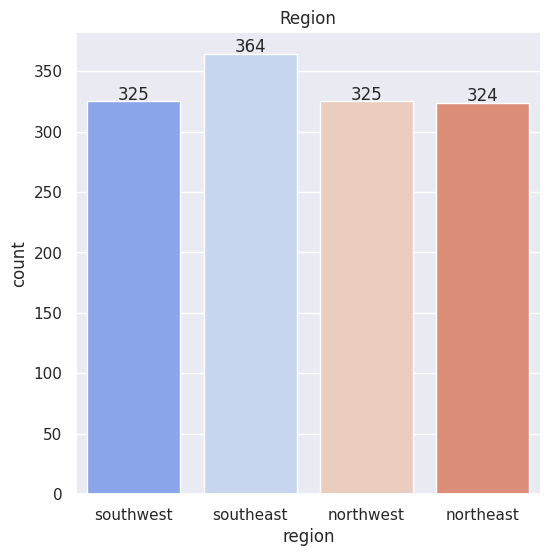

In [19]:
# region column

# Plot with count labels on top of each bar
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='region', data=insurance_dataset, palette='coolwarm')
plt.title('Region')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.show()

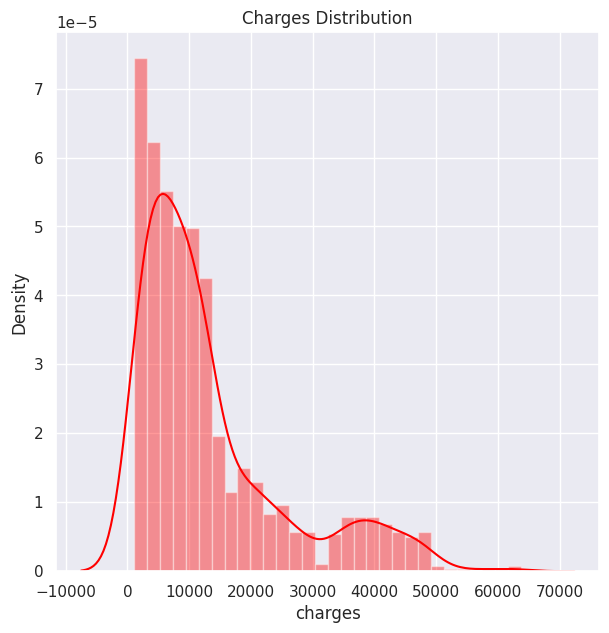

In [21]:
# distribution of charges value
plt.figure(figsize=(7,7))
sns.distplot(insurance_dataset['charges'], color = 'red')
plt.title('Charges Distribution')
plt.show()

It is left skewed distribution

##4. Data Pre-Processing

Computers only understand numerical values, so we are going to convert our categorical datas in numerical values This is called Encoding Categorical Features.

In [22]:
# encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [23]:
insurance_dataset.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
5,31,1,25.740,0,1,0,3756.62160
6,46,1,33.440,1,1,0,8240.58960
7,37,1,27.740,3,1,3,7281.50560
8,37,0,29.830,2,1,2,6406.41070
9,60,1,25.840,0,1,3,28923.13692


It is successfully encoded.

Splitting the Features and Target.

In [24]:
X = insurance_dataset.drop(columns='charges', axis=1) #drop is going to delete the charges
#so the remaining colums will be in feeature


Y = insurance_dataset['charges'] #this code is only masking out or selecting the column 'charges'
#it is our target

In [27]:
X #this is our feature

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [28]:
Y #this is our target

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


##5. Splitting the data into Training data & Testing Data

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [31]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1338,) (1070,) (268,)


##6. Model Training

We are going to use Linear Regression. If this model is not performing well we will go for other algorithms.

In [32]:
# loading the Linear Regression model
regressor = LinearRegression()

In [33]:
regressor.fit(X_train, Y_train)

LinearRegression()

##7. Model Evaluation

In [34]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

In [37]:
# R squared value
r2_train_lr = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value : ', r2_train_lr)

R squared value :  0.751505643411174


In [38]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

In [40]:
# R squared value
r2_test_lr = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value : ', r2_test_lr)

R squared value :  0.7447273869684076


In [41]:
print('R squared value for train data: ', r2_train_lr)
print('R squared value for test data: ', r2_test_lr)

R squared value for train data:  0.751505643411174
R squared value for test data:  0.7447273869684076


##8. Building a Predictive System

In [76]:
# Example input data
input_data = (31, 1, 25.74, 0, 1, 0)

# Changing input_data to a pandas DataFrame
input_data_as_dataframe = pd.DataFrame([input_data], columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])

#we are inputing data of 6 columns and we want to predict the 7th (target) column 'charges'

# Make prediction
prediction = regressor.predict(input_data_as_dataframe)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3760.0805765]
The insurance cost is USD  3760.080576496057


##9. Saving The File

In [43]:
import pickle

# `regressor` is my trained model
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(regressor, file)

print("Model saved successfully!")

Model saved successfully!


0 < R² < 1: An R-squared value closer to 1 indicates that a greater proportion of variance is explained by the model, suggesting a better fit. An R-squared value closer to 0 indicates that the model does not explain much of the variability in the data, suggesting a poorer fit.

our r squared value for train data and test data is very close that means the model did not overfit.

but the r squared value is low, Lenear Regression is not good with multiple features, also if the features are correlated to each other then LR does not perform well.

We will use xgboost alg, because it can capture the relation between features.

## 10. New ML Alg (XGBoost)

In [45]:
from xgboost import XGBRegressor

In [46]:
#Initialize XGBoost Regressor
Regressor2 = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=6,
    objective='reg:squarederror',
    eval_metric='rmse'
)

In [47]:
#Train the model
Regressor2.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [49]:
#Make predictions and evaluate

training_data_prediction_2 = Regressor2.predict(X_train)
test_data_prediction_2 = Regressor2.predict(X_test)

# Calculate R-squared for training and test sets

r2_train_xg = metrics.r2_score(Y_train, training_data_prediction_2)
r2_test_xg = metrics.r2_score(Y_test, test_data_prediction_2)

In [50]:
print(f"R-squared on training data: {r2_train_xg}")
print(f"R-squared on test data: {r2_test_xg}")

R-squared on training data: 0.999972264827085
R-squared on test data: 0.8083432203747147


In [65]:
#Save the XGBoost model using pickle
with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(Regressor2, file)

print("XGBoost model saved successfully!")

XGBoost model saved successfully!


our model performed well on train data got 99% but in test data 80%
it is an improvement from LR but the difference between R-squared on training data and R-squared on test data is large.

The overfiting has happened.

We will try CatBoost alg, it is suiatble for categorical data. and we have 3 categorical features.

## New ML Alg (CatBoost)

In [51]:
categorical_features = ['sex', 'smoker', 'region']

we need to pass the categorical features separately, thats why we craeted 'categorical_features' this variable.

In [53]:
 Regressor3 = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='RMSE',
    verbose=100)

In [54]:
Regressor3.fit(
    X_train, Y_train,
    cat_features=categorical_features,
    eval_set=(X_test, Y_test),
    early_stopping_rounds=50
)


0:	learn: 11189.8331191	test: 11382.7187384	best: 11382.7187384 (0)	total: 47.9ms	remaining: 47.8s
100:	learn: 3935.9037309	test: 4467.0320807	best: 4465.0593890 (75)	total: 159ms	remaining: 1.41s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 4462.564254
bestIteration = 106

Shrink model to first 107 iterations.


In [58]:
#Make predictions and evaluate

training_data_prediction_3 = Regressor3.predict(X_train)
test_data_prediction_3 = Regressor3.predict(X_test)

# Calculate R-squared for training and test sets

r2_train_cat = metrics.r2_score(Y_train, training_data_prediction_3)
r2_test_cat = metrics.r2_score(Y_test, test_data_prediction_3)

In [59]:
print(f"R-squared on training data: {r2_train_cat}")
print(f"R-squared on test data: {r2_test_cat}")

R-squared on training data: 0.8875020649882986
R-squared on test data: 0.8673965973109141


here we can see there is no over fitting.

Also the value of R squared increased

In [64]:
#Save the CatBoost model using pickle
with open('catboost_model.pkl', 'wb') as file:
    pickle.dump(Regressor3, file)

print("CatBoost model saved successfully!")

CatBoost model saved successfully!


##11. Comparison Of Models

In [63]:
#for LR
print(f"R-squared on training data of Linear Regression : {r2_train_lr}")
print(f"R-squared on test data Linear Regression : {r2_test_lr}")
print("- " * 30)
#for XG
print(f"R-squared on training data of XGBoost : {r2_train_xg}")
print(f"R-squared on test data of XGBoost : {r2_test_xg}")
print("- " * 30)
#for CAT
print(f"R-squared on training data of CatBoost : {r2_train_cat}")
print(f"R-squared on test data Linear CatBoost : {r2_test_cat}")

R-squared on training data of Linear Regression : 0.751505643411174
R-squared on test data Linear Regression : 0.7447273869684076
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
R-squared on training data of XGBoost : 0.999972264827085
R-squared on test data of XGBoost : 0.8083432203747147
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
R-squared on training data of CatBoost : 0.8875020649882986
R-squared on test data Linear CatBoost : 0.8673965973109141


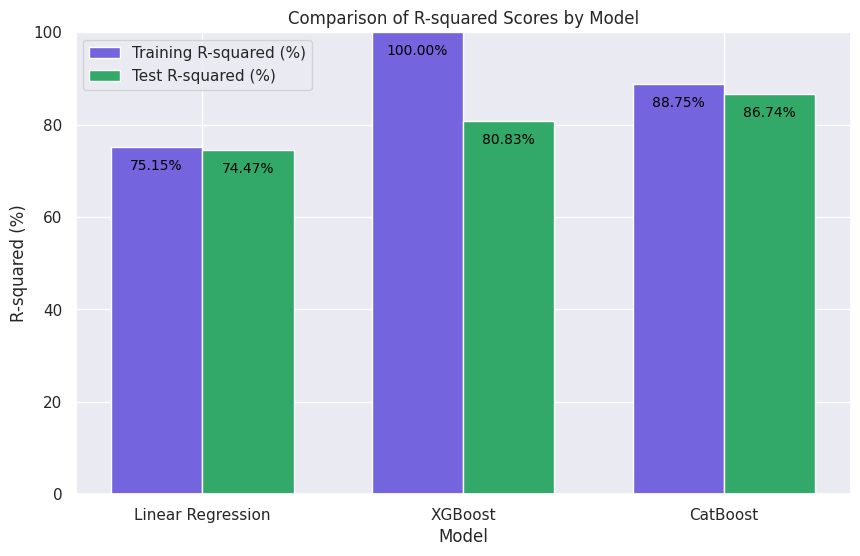

In [73]:
import matplotlib.pyplot as plt

# Define the models and their R-squared values (multiplied by 100 to display as percentages)
models = ['Linear Regression', 'XGBoost', 'CatBoost']
r2_train_scores = [r2_train_lr * 100, r2_train_xg * 100, r2_train_cat * 100]  # Training R-squared values in percentages
r2_test_scores = [r2_test_lr * 100, r2_test_xg * 100, r2_test_cat * 100]    # Test R-squared values in percentages

# Plotting
plt.figure(figsize=(10, 6))

# Bar width
bar_width = 0.35

# Positions of the bars on the x-axis
r1 = range(len(models))
r2 = [x + bar_width for x in r1]

# Create bar plots with darker colors
bars1 = plt.bar(r1, r2_train_scores, color='#7464de', width=bar_width, label='Training R-squared (%)')  # Darker blue
bars2 = plt.bar(r2, r2_test_scores, color='#32a869', width=bar_width, label='Test R-squared (%)')     # Darker green

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('R-squared (%)')
plt.title('Comparison of R-squared Scores by Model')
plt.xticks([r + bar_width / 2 for r in range(len(models))], models)  # Centers the model names on the x-axis
plt.ylim(0, 100)  # Set y-axis to display from 0 to 100%

# Display legend
plt.legend()

# Annotate bars with R-squared values
for bar in bars1:  # Training scores
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5,
             f'{bar.get_height():.2f}%', ha='center', color='black', fontsize=10)

for bar in bars2:  # Test scores
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5,
             f'{bar.get_height():.2f}%', ha='center', color='black', fontsize=10)

# Show the plot
plt.show()


##1. Linear Regression:

**Training R²:** 0.75

**Testing R²:** 0.74

Linear regression shows reasonable performance but does not capture all complexities of our dataset, as evidenced by relatively lower R² values compared to the other models. Linear regression is often less effective with complex patterns or non-linear relationships, which our data is having.
##2. XGBoost:

**Training R²:** 0.9999 (almost perfect fit)

**Testing R²:** 0.80

XGBoost performs exceptionally well on the training data, showing a near-perfect R², but there’s a noticeable drop when predicting on test data. This indicates some overfitting, where the model learns too much from training data details, potentially making it less generalizable.
##3. CatBoost:

**Training R²:** 0.88

**Testing R²:** 0.87

CatBoost maintains a good balance between training and test performance, achieving a high R² without extreme overfitting. With a test R² of 0.87, it generalizes better than XGBoost for this dataset.

##Suggestions to Further Improve Performance
**1. Regularization for XGBoost:** Applying stronger regularization in XGBoost might reduce overfitting, balancing the R² scores across training and testing data.

**2. Hyperparameter Tuning:** Although CatBoost already performs well, additional fine-tuning, perhaps with more trials in Optuna, could push the R² on test data slightly higher.

**3. Feature Engineering:** Adding relevant features or creating polynomial interactions (if feasible) might allow even linear models to capture more variance.

**4. Ensemble Approaches:** Combining predictions from CatBoost and XGBoost could yield better generalization if the models capture different aspects of the data patterns.